In [5]:
import pandas as pd

In [6]:
df = pd.read_excel('titanic3.xls')

In [7]:
df.head(n=10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [8]:
df.shape

(1309, 14)

In [9]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

# cleaning

In [10]:
df.drop(['fare','home.dest','name'],axis=1,inplace=True)


In [11]:
df['age']=df['age'].fillna(0)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

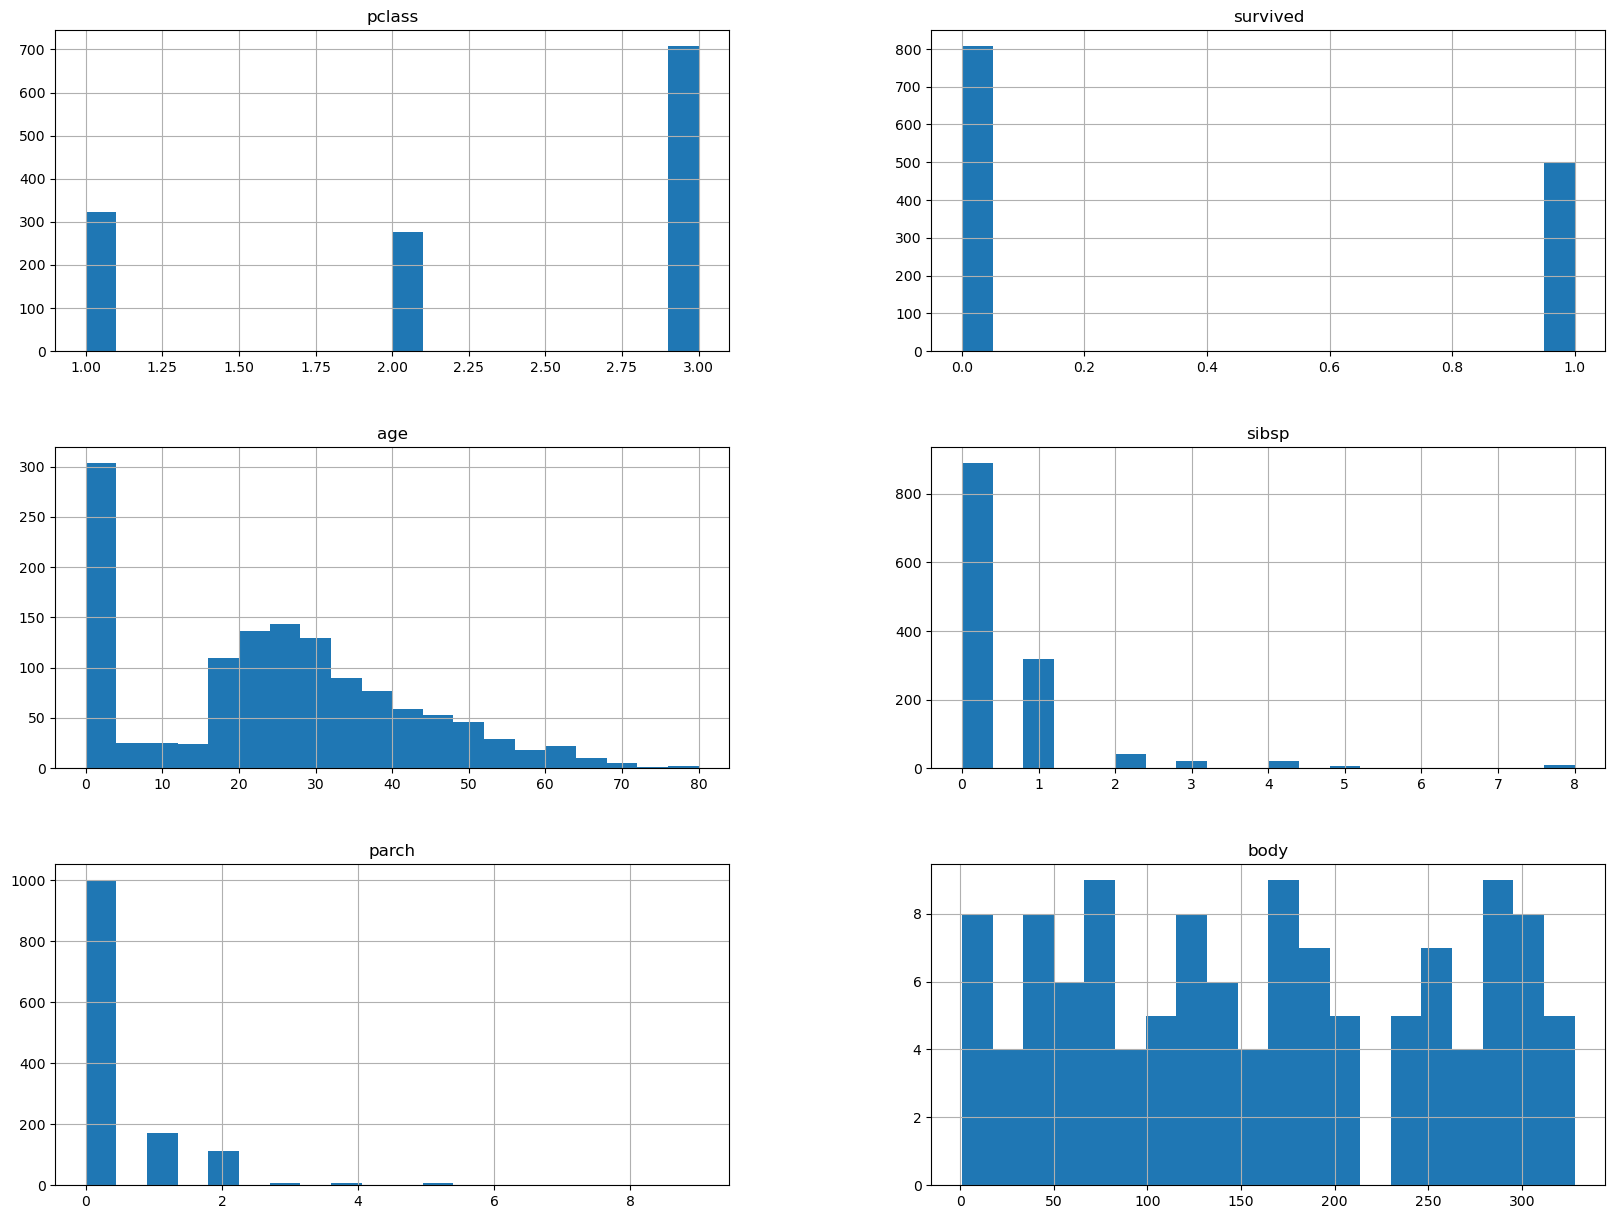

In [13]:
df.hist(bins=20,figsize=(20,15))
plt.show()

# outliers


In [14]:
df_copy= df.copy()

In [15]:
df_copy['age'].iloc[0:10] = 500

C:\Users\Ghazala\AppData\Local\Temp\ipykernel_10008\4200277411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['age'].iloc[0:10] = 500


In [16]:
df_copy.head(15)

,pclass,survived,sex,age,sibsp,parch,ticket,cabin,embarked,boat,body
0,1,1,female,500.0,0,0,24160,B5,S,2,NaN
1,1,1,male,500.0,1,2,113781,C22 C26,S,11,NaN
2,1,0,female,500.0,1,2,113781,C22 C26,S,NaN,NaN
3,1,0,male,500.0,1,2,113781,C22 C26,S,NaN,135.0
4,1,0,female,500.0,1,2,113781,C22 C26,S,NaN,NaN
5,1,1,male,500.0,0,0,19952,E12,S,3,NaN
6,1,1,female,500.0,1,0,13502,D7,S,10,NaN
7,1,0,male,500.0,0,0,112050,A36,S,NaN,NaN
8,1,1,female,500.0,2,0,11769,C101,S,D,NaN
9,1,0,male,500.0,0,0,PC 17609,NaN,C,NaN,22.0


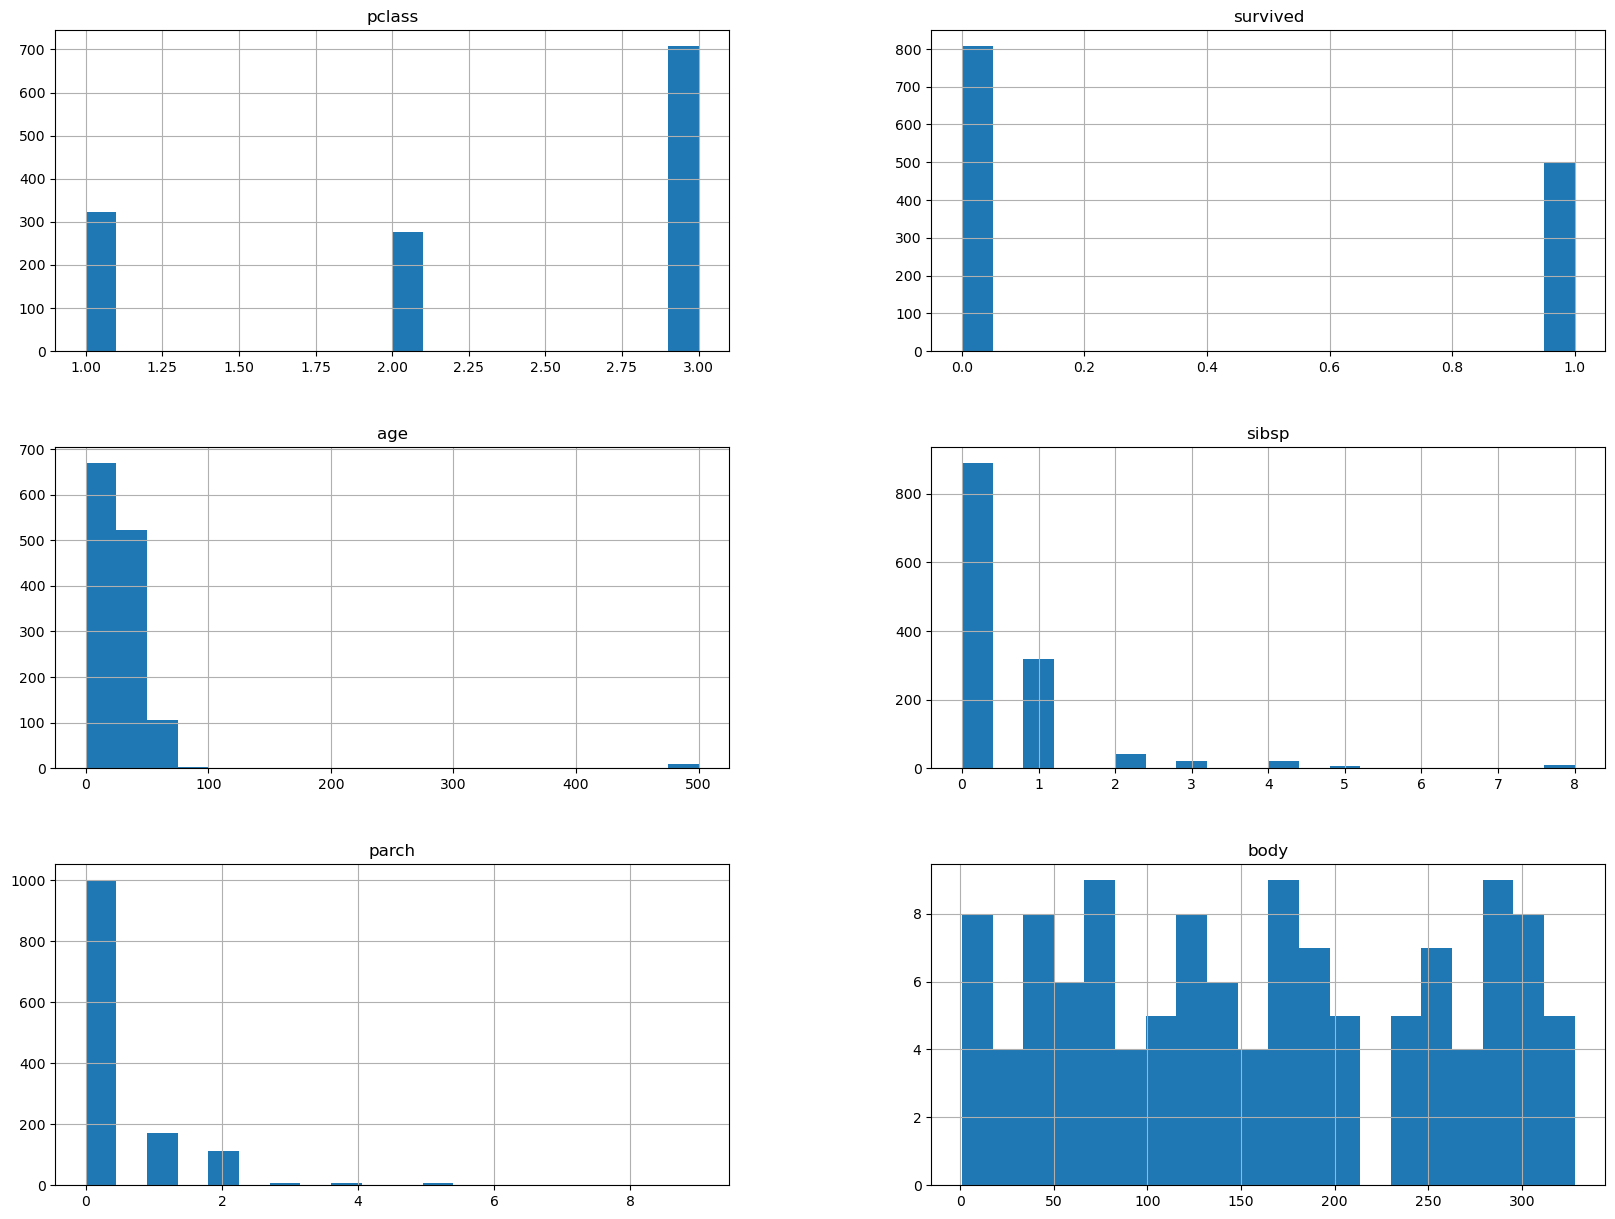

In [17]:
df_copy.hist(bins=20,figsize=(20,15))
plt.show()

In [18]:
df_copy[df_copy['age'] > 100]['age'].index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [19]:
df_copy.drop(df_copy[df_copy['age'] > 100]['age'].index,inplace=True)

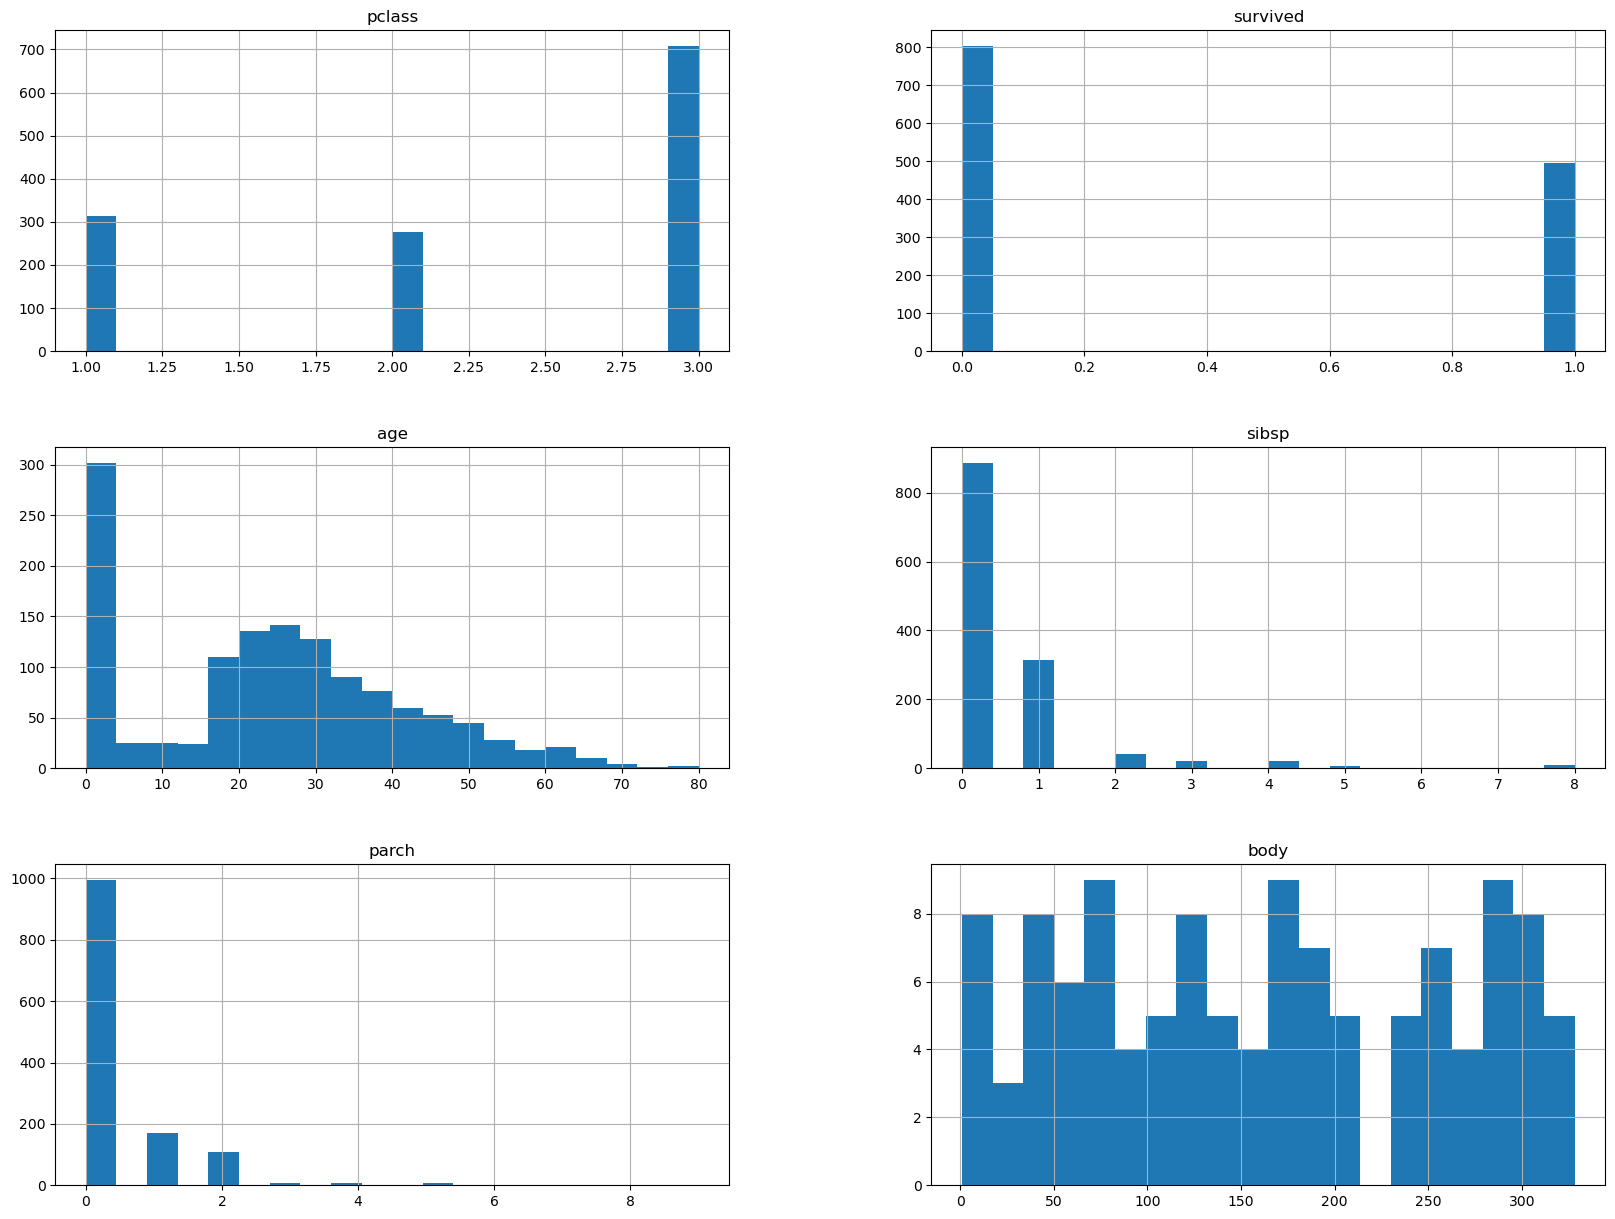

In [20]:
df_copy.hist(bins=20,figsize=(20,15))
plt.show()

# i'm alive

# watch down only

In [21]:
df['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [22]:
gender_df = df[df['sex']=='male']
gender_df.shape        

(843, 11)

In [23]:
survived = gender_df[ gender_df['survived']==1]
survived.shape[0]


161

In [24]:
survived_precentage = survived.shape[0]/gender_df.shape[0] *100
survived_precentage

19.098457888493474

In [25]:
for x in df['pclass'].unique() :
    print(x)
    x_df = df[df['pclass']==x]
    survived_x = x_df[x_df['survived']==1]
    survived_xprecentage = survived_x.shape[0]/x_df.shape[0] *100
    print(f"count :{x_df.shape[0]}")
    print(f"precentage : {round(survived_xprecentage)} %")
    print("=="*5)
    

1
count :323
precentage : 62 %
2
count :277
precentage : 43 %
3
count :709
precentage : 26 %


<hr>

In [26]:
df['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [27]:
males = df[df['sex']=='male']
males.shape   

(843, 11)

In [28]:
survived_males =males[males['survived']==1]
survived_males.shape

(161, 11)

In [29]:
survived_precentage = survived_males.shape[0] / males.shape[0] *100 
survived_precentage


19.098457888493474

In [30]:
for i in df['sex'].unique() :
    gendere = df[df['sex']==i]
    survived_gendere =gendere[gendere['survived']==1]
    survived_precentage = (survived_gendere.shape[0] / gendere.shape[0]) *100 
    print(i)
    print(f"count : {gendere.shape[0]}")
    print(f"the precentage : {round(survived_precentage)}%")
    print("\n====\n")



female
count : 466
the precentage : 73%

====

male
count : 843
the precentage : 19%

====



In [31]:
for x in df['pclass'].unique() :
    stage = df[df['pclass']==x]
    stage_survived = stage[stage['survived']==1]
    survived_precentage = (stage_survived.shape[0] / stage.shape[0]) *100 
    print(x)
    print(f"counts : {stage.shape[0]}")
    print(f"survived_numbers : {stage_survived.shape[0]}")
    print(f"the precentage : {round(survived_precentage)}%")
    if x!=3 :
        print("\n====\n")

1
counts : 323
survived_numbers : 200
the precentage : 62%

====

2
counts : 277
survived_numbers : 119
the precentage : 43%

====

3
counts : 709
survived_numbers : 181
the precentage : 26%


# apply function
- to make a new column  age_phase

In [32]:
def transfer_age (age):
    if age <4 :
        return 0 #'baby'
    elif age <8 :
        return 1 #'chalid'
    elif age <12 :
        return 2 #'young boy'
    elif age < 18 :
        return 3 #'boy'
    elif age <25 :
        return 4 #'young adult'
    elif age <50 :
        return 5 #'adult'
    return 6


identfiy_age = {
    0 : 'baby' ,
    1 : 'chalid' ,
    2 : 'young boy' ,
    3 : 'boy' ,
    4 : 'young adult' ,
    5 : 'adult' ,
    6 : 'elder'
}    

In [33]:
df['age_phase'] = df['age'].apply(transfer_age)
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,cabin,embarked,boat,body,age_phase
0,1,1,female,29.0000,0,0,24160,B5,S,2,NaN,5
1,1,1,male,0.9167,1,2,113781,C22 C26,S,11,NaN,0
2,1,0,female,2.0000,1,2,113781,C22 C26,S,NaN,NaN,0
3,1,0,male,30.0000,1,2,113781,C22 C26,S,NaN,135.0,5
4,1,0,female,25.0000,1,2,113781,C22 C26,S,NaN,NaN,5


In [34]:
identfiy_age

{0: 'baby',
 1: 'chalid',
 2: 'young boy',
 3: 'boy',
 4: 'young adult',
 5: 'adult',
 6: 'elder'}

<AxesSubplot:>

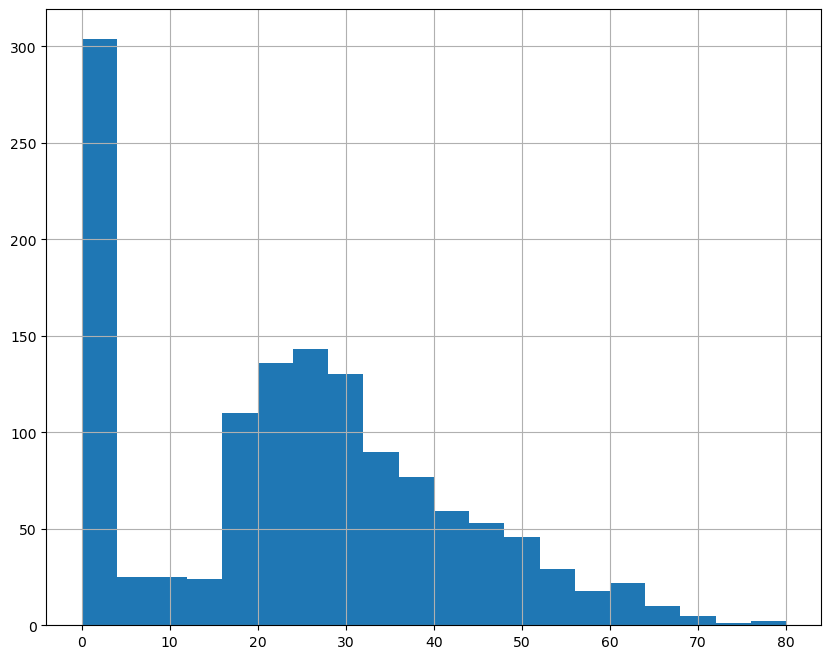

In [39]:
df['age'].hist(bins = 20 , figsize= (10,8))

## The End

#                           <hr>